# Quantifying Natural Behavior - Unsupervised Learning

This notebook is designed to remove the rust and help you get back into the flow of quantifying natural behavior using unsupervised learning techniques.
We will explore various algorithms and approaches to analyze and interpret complex datasets effectively.


## About Google Colab

Google Colab is a cloud-based Jupyter notebook environment that allows you to write and execute Python code in your browser. It provides free access to GPUs and TPUs, making it an excellent choice for machine learning and data analysis tasks. With Google Colab, you can easily share your notebooks, collaborate with others in real-time, and access powerful computational resources without the need for local installation.

## Mounting Google Drive

When working with Google Colab, you may want to access files stored in your Google Drive. Mounting your Google Drive allows you to read from and write to it directly from your Colab notebook. This is particularly useful for loading datasets or saving your results.
### How to Mount Google Drive
To mount your Google Drive, you can use the following steps:

Import the Drive Module: First, you'll need to import the drive module from google.colab.


    from google.colab import drive
    drive.mount('/content/drive')

1. Add a code cell below and run the above two commands
2. Allow google to mount your drive



## How to save and easily access the colab notebook
1. Open google drive in a new tab
2. Craete a new folder and name it "Quantifying Natural Behavior - Unsupervised Learning"
3. Create two subfolders and name name "data" and "notebooks"
4. Transfer this colab notebook to your *notebooks* subfolder:
  1. File -> Locate in drive
  2. Right click on the new file: Organize -> Move

## How to load a file to the colab notebook

1. Download and save the file "sound_acc.csv" in your google drive "data" folder
2. After mounting the drive, you should have access to the file

## Installation

In a typical Python environment, such as a conda or pip environment, you would create a virtual environment and install all necessary packages beforehand.

This ensures that your project has all the required dependencies in a controlled setting.

However, when using Google Colab, you need to install any additional packages every time you start a new session. This is because Google Colab runs on a fresh virtual machine each time you open a notebook.

To install packages in Google Colab, you can use the !pip install command directly in a code cell.

For example, to install the umap-learn library, you would run:

In [ ]:
#!pip install umap-learn


## Imports
The first this allways do when starting a new notebook of python file is to import relevant packages

The packages contain usefull functions for variuse tasks.
Here are some of the more usefull packages:


In [1]:
# Importing necessary libraries for data analysis and visualization
# NumPy is fundamental for numerical computations
import numpy as np

# Pandas is used for data manipulation and analysis
import pandas as pd

# Matplotlib is a comprehensive library for creating visualizations
import matplotlib.pyplot as plt

# Seaborn provides a high-level interface for attractive statistical graphics
import seaborn as sns

# Scikit-learn offers simple and efficient tools for machine learning
from sklearn import datasets, model_selection, preprocessing

# SciPy adds additional functionality for scientific and technical computing
from scipy import stats

# TensorFlow or PyTorch can be used for deep learning tasks
import tensorflow as tf  # or use import torch for PyTorch

# import torch

# OS module is for interacting with the operating system
import os



ModuleNotFoundError: No module named 'tensorflow'

In [13]:
# now get the path to the csv file:
path_to_file = './sound_acc.csv'

In [14]:

# Use pandas to load the csv file
df = pd.read_csv(path_to_file)

In [15]:
# We can see a summary of this table by using the following command:
df.describe()

,v1_mfcc1,v1_mfcc2,v1_mfcc3,v1_mfcc4,v1_mfcc5,v1_mfcc6,v1_mfcc7,v1_mfcc8,v1_mfcc9,v1_mfcc10,...,v2_maxX,v2_maxY,v2_maxZ,v2_corXY,v2_corXZ,v2_corYZ,v2_meanMagnitude,v2_sdMagnitude,v2_auc,v2_meanDif
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,...,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1.386000e+03
mean,120.659467,-4.504259,-5.787432,-4.324000,-4.825497,-3.788440,-4.690573,-2.480306,-4.604397,-1.655253,...,0.536432,1.281976,0.800218,-0.094052,-0.265245,-0.125618,1.041049,0.161993,77.185500,-1.036610e-04
std,8.801973,4.519904,3.885086,2.461543,3.466517,2.253607,2.436451,2.924725,2.446138,2.084550,...,0.445107,0.808937,0.526431,0.419034,0.396965,0.430093,0.085482,0.169814,11.716791,4.528478e-03
min,102.782374,-17.199848,-20.902389,-16.869692,-17.385292,-14.303205,-14.523439,-14.227714,-16.232274,-10.628308,...,-0.592773,-0.051758,-0.569336,-0.958280,-0.971059,-0.993749,0.954546,0.001502,29.983772,-9.183864e-02
25%,115.487452,-8.144506,-7.953496,-5.867742,-6.549288,-5.193103,-5.815710,-3.857191,-5.852429,-2.931954,...,0.220947,0.848267,0.477600,-0.428407,-0.564988,-0.452535,1.000600,0.036520,72.156624,-9.389435e-04
50%,120.040872,-3.967480,-4.826121,-4.062119,-4.958848,-3.699664,-4.432076,-2.458651,-4.522926,-1.742899,...,0.477661,1.059937,0.827271,-0.098409,-0.314192,-0.166065,1.011917,0.107460,77.380178,-8.550000e-08
75%,125.858721,-1.304871,-3.088805,-2.749132,-3.143541,-2.264276,-3.238752,-0.971559,-3.285079,-0.404461,...,0.787781,1.537598,1.089050,0.197889,-0.003704,0.193795,1.054199,0.245783,83.045108,1.131441e-03
max,141.189588,8.979294,3.265064,2.918457,11.178750,4.725620,3.326617,9.548100,4.623490,9.988957,...,3.034668,7.999023,4.189453,0.952155,0.944848,0.960379,2.502673,1.871098,182.695101,1.669254e-02


In [16]:
# Get a list of the different columns in the dataframe
df.columns

Index(['label', 'v1_mfcc1', 'v1_mfcc2', 'v1_mfcc3', 'v1_mfcc4', 'v1_mfcc5',
       'v1_mfcc6', 'v1_mfcc7', 'v1_mfcc8', 'v1_mfcc9', 'v1_mfcc10',
       'v1_mfcc11', 'v1_mfcc12', 'v2_meanX', 'v2_meanY', 'v2_meanZ', 'v2_sdX',
       'v2_sdY', 'v2_sdZ', 'v2_maxX', 'v2_maxY', 'v2_maxZ', 'v2_corXY',
       'v2_corXZ', 'v2_corYZ', 'v2_meanMagnitude', 'v2_sdMagnitude', 'v2_auc',
       'v2_meanDif'],
      dtype='object')

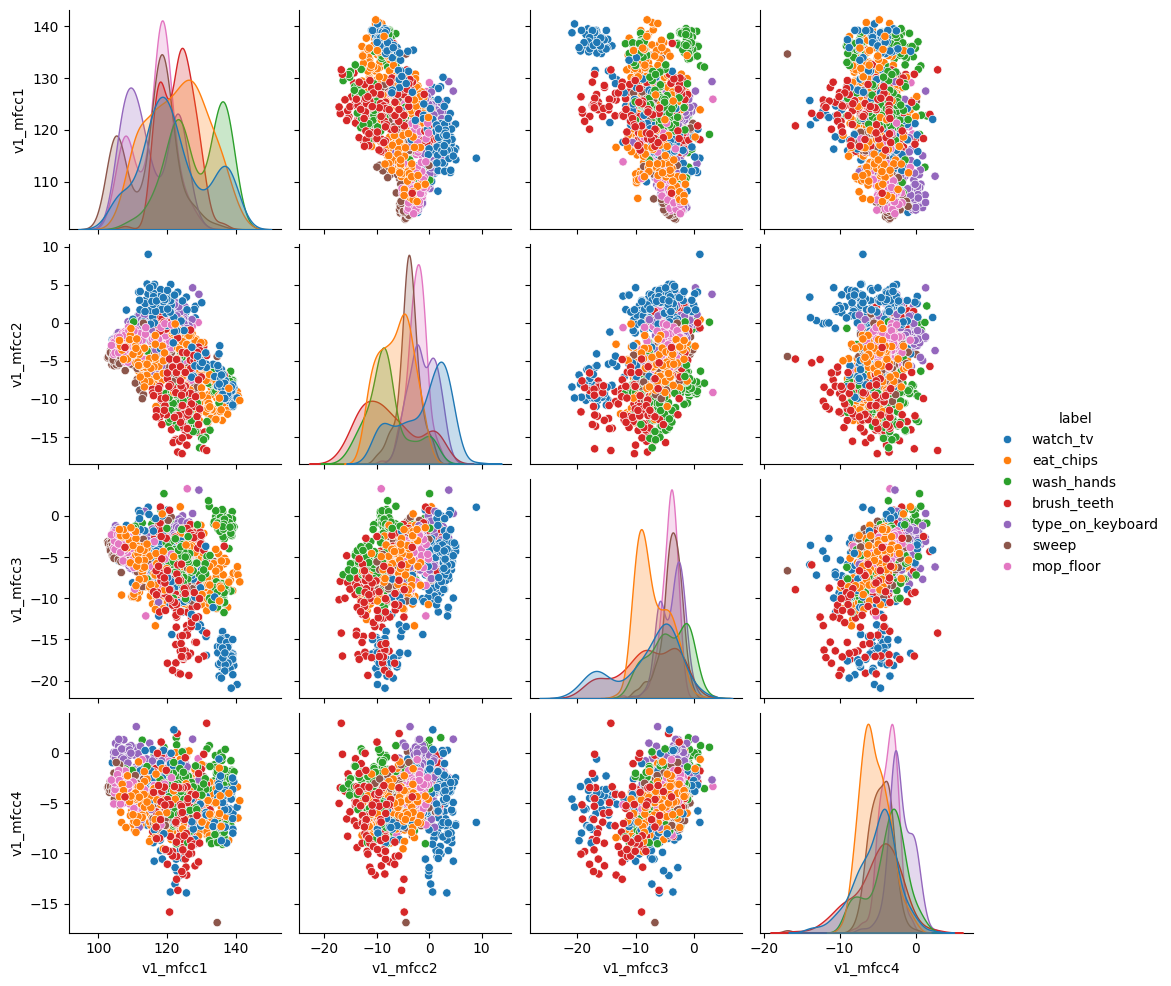

In [ ]:
# We can visualize the relashionship between specific (or all) pairs of variable using seaborn package
# hue - variable used to set the color and grouping of the data, in this case, we will use 'label' as our hue
# vars - a list of column names to plot, if we don't set any value here, it will plot all pairs, and that will take a lot of time, so let's only use the first few columns for this demonstration.
sns.pairplot(df, hue='label', vars=['v1_mfcc1','v1_mfcc2','v1_mfcc3','v1_mfcc4'])

## Basic statistical analysis
We can be a bit smarter with this but running some basic statistical analaysis

In many cases, we need custom functions so we have to define them within the notebook and run the cell.

Below is a function to run basic statistical analysis to find the significance of each column with regards to the label


In [ ]:
# We can be a bit smarter with this but running some basic statistical analaysis
def calculate_statistical_significance(df, labels_column):
    """
    Calculate statistical significance for each feature in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing features and labels.
    labels_column (str): The name of the column containing the labels.

    Returns:
    pd.DataFrame: A DataFrame containing features and their corresponding p-values.
    """
    # Separate the labels and features
    features = df.drop(columns=[labels_column])
    labels = df[labels_column]

    # Initialize a list to store p-values
    p_values = {}

    # Loop through each feature column
    for feature in features.columns:
        # Perform ANOVA F-test
        groups = [group[feature].values for name, group in df.groupby(labels_column)]
        f_statistic, p_value = stats.f_oneway(*groups)
        p_values[feature] = p_value

    # Create a DataFrame to store results
    p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'P-Value'])
    return p_values_df

In [ ]:
# Now use the function to rate the variables
p_values_df = calculate_statistical_significance(df, labels_column='label')

In [ ]:
p_values_df

,Feature,P-Value
0,v1_mfcc1,6.613386e-91
1,v1_mfcc2,1.817839e-129
2,v1_mfcc3,4.507747e-71
3,v1_mfcc4,1.399173e-68
4,v1_mfcc5,1.721894e-91
5,v1_mfcc6,1.615425e-49
6,v1_mfcc7,6.676605e-77
7,v1_mfcc8,1.252805e-60
8,v1_mfcc9,4.365364e-35
9,v1_mfcc10,1.761076e-29


In [ ]:
# Lets sort the df and take the top 5 variable
p_values_df.sort_values(by='P-Value', ascending=True).head(5)

,Feature,P-Value
14,v2_meanZ,2.839683e-259
13,v2_meanY,1.809554e-236
17,v2_sdZ,2.189793e-189
25,v2_sdMagnitude,4.112931e-178
15,v2_sdX,9.359174e-173


In [ ]:
vars = p_values_df.sort_values(by='P-Value', ascending=True).head(5).Feature.values
vars

array(['v2_meanZ', 'v2_meanY', 'v2_sdZ', 'v2_sdMagnitude', 'v2_sdX'],
      dtype=object)

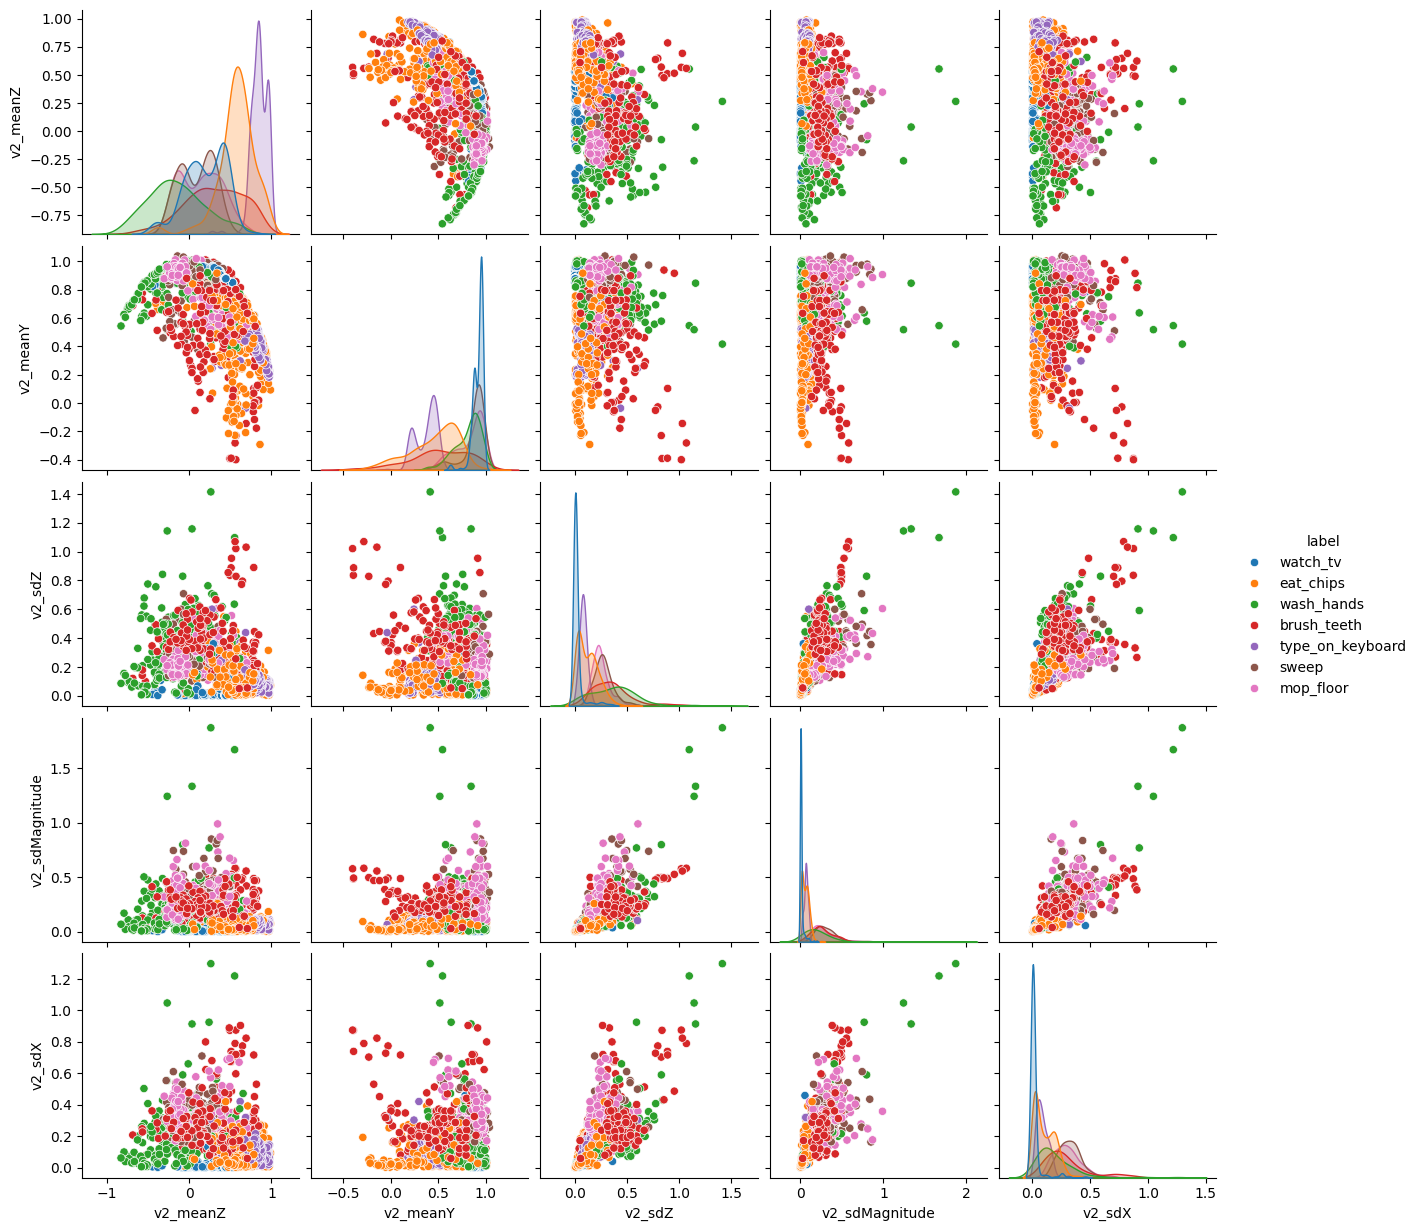

In [ ]:
# and run the pairplot again only for these variable:
sns.pairplot(df, hue='label', vars=vars)